# Import and Read

In [1]:
from IPython.core.display import display, HTML
from IPython import get_ipython as get_ipython
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important;margin-left:-30px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/Users/andrey.golda/.pyenv/versions/3.9.0/lib/python3.9/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [22]:
df = pd.read_csv('./data/clasdb_pi_plus_n.txt', delimiter='\t', header=None)
df.columns = ['Ebeam', 'W', 'Q2', 'cos_theta', 'phi', 'dsigma_dOmega', 'error', 'id']

In [23]:
df.loc[8314:65671, 'Ebeam'] = 5.754

In [24]:
df.iloc[8314:8317]

,Ebeam,W,Q2,cos_theta,phi,dsigma_dOmega,error,id
8314,5.754,1.11,1.715,-0.1,7.5,0.24835,0.08115,E13M1
8315,5.754,1.11,1.715,-0.1,22.5,0.31508,0.08929,E13M1
8316,5.754,1.11,1.715,-0.1,37.5,0.33037,0.09702,E13M1


# XGB

In [25]:
df_se = df[df.Ebeam == 5.754]

In [26]:
# Extract the features and target column
X = df_se[['Ebeam', 'W', 'Q2', 'cos_theta', 'phi']]
y = df_se['dsigma_dOmega']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', )
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set and calculate the mean squared error
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

/Users/andrey.golda/.pyenv/versions/3.9.0/lib/python3.9/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Mean Squared Error: 0.011048374969677944


In [33]:
df_fix = df_se[(df_se.Ebeam == 5.754)&(df_se.W == 1.110)&(df_se.Q2 == 1.715)&(df_se.cos_theta==0.7)]

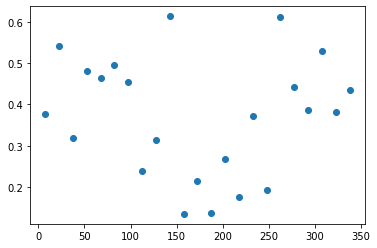

In [34]:
plt.scatter(x=df_fix.phi, 
            y=df_fix.dsigma_dOmega)